## Import libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
from srs.analysis import read_data, plot_missing_values, plot_max_median, plot_correlation_between_stations, \
    remove_outliers, interpolate_missing_values, calculate_mean_value_across_all_stations, save_mean_data

## Read data

In [3]:
data = read_data('PM10')
stations = data.columns.tolist()[1:]

In [4]:
stations

['WpPoznDabrow', 'WpPoznRatajeMOB']

In [5]:
data

Time  WpPoznDabrow  WpPoznRatajeMOB
0    2020-01-01 00:00:00       37.3714          28.9952
1    2020-01-01 01:00:00       20.2835          18.6745
2    2020-01-01 02:00:00       20.3019          20.7499
3    2020-01-01 03:00:00       20.4632          20.8281
4    2020-01-01 04:00:00       19.8122          19.0966
...                  ...           ...              ...
8779 2020-12-31 19:00:00           NaN          85.5207
8780 2020-12-31 20:00:00           NaN         101.3240
8781 2020-12-31 21:00:00           NaN         102.1370
8782 2020-12-31 22:00:00           NaN         108.8390
8783 2020-12-31 23:00:00           NaN          94.5070

[8784 rows x 3 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             8784 non-null   datetime64[ns]
 1   WpPoznDabrow     7854 non-null   float64       
 2   WpPoznRatajeMOB  8764 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 206.0 KB


In [7]:
data.describe().T

count       mean        std      min        25%       50%  \
WpPoznDabrow     7854.0  23.621556  15.271192  1.75846  12.814725  19.79005   
WpPoznRatajeMOB  8764.0  23.493739  17.707101  1.64488  12.031125  18.59440   

                      75%      max  
WpPoznDabrow     30.35650  143.701  
WpPoznRatajeMOB  29.25485  246.382

### Investigate missing values

In [8]:
data.isnull().mean().round(3)

Time               0.000
WpPoznDabrow       0.106
WpPoznRatajeMOB    0.002
dtype: float64

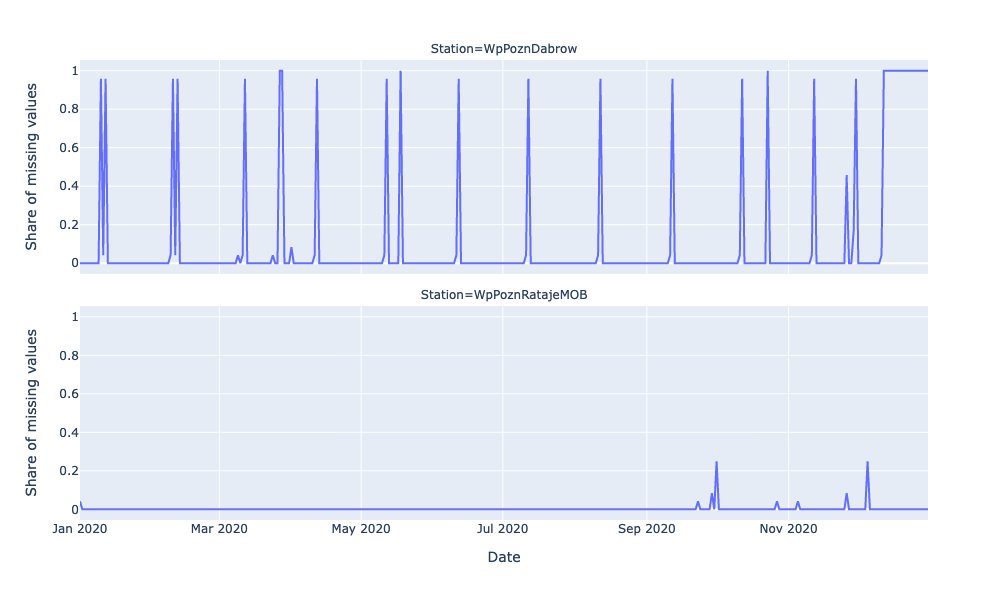

In [9]:
plot_missing_values(data, stations)

## EDA

**Maximum and median values**

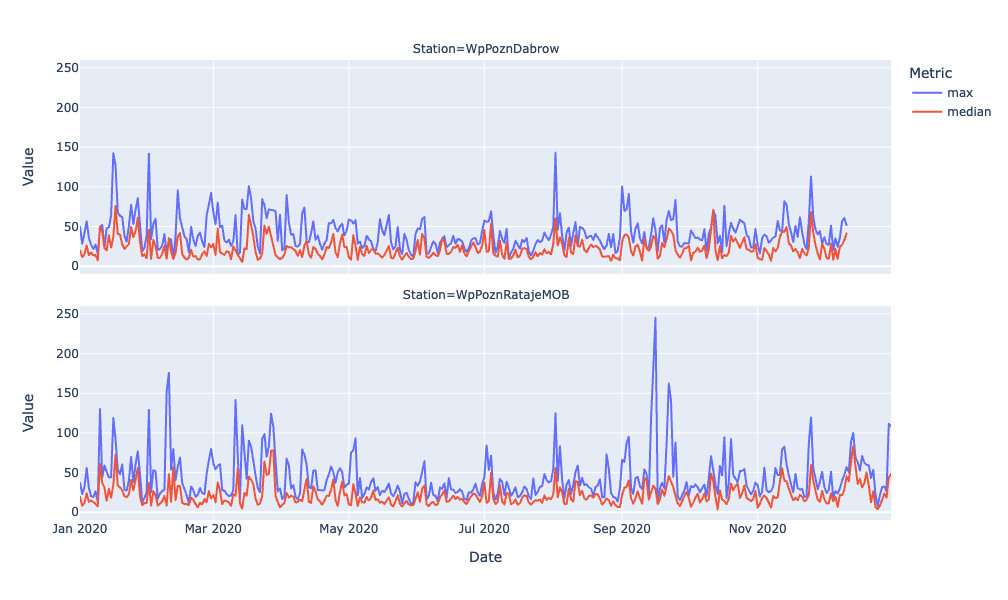

In [10]:
plot_max_median(data, stations)

**Correlation between stations**

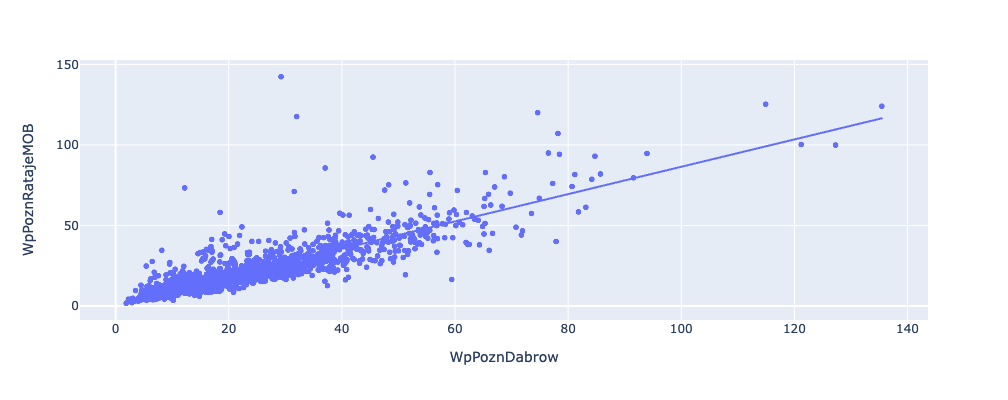

In [11]:
plot_correlation_between_stations(data, stations[0], stations[1])

**Change between consecutive hours**

In [12]:
def plot_change_between_consecutive_hours(data, stations):
    """Plot a difference between consecutive hours"""
    df = data[stations] - data[stations].shift(1)
    df = df.dropna()
    df = df.melt(var_name='Station', value_name='Difference')
    fig = px.histogram(df, x='Difference', color='Station', height=600)
    print(df.groupby('Station').agg(['mean', 'median', 'max', 'std']))
    fig.show()

                Difference                              
                      mean    median       max       std
Station                                                 
WpPoznDabrow     -0.004112 -0.002615   46.5013  4.934664
WpPoznRatajeMOB  -0.015679 -0.024660  215.6908  6.849992


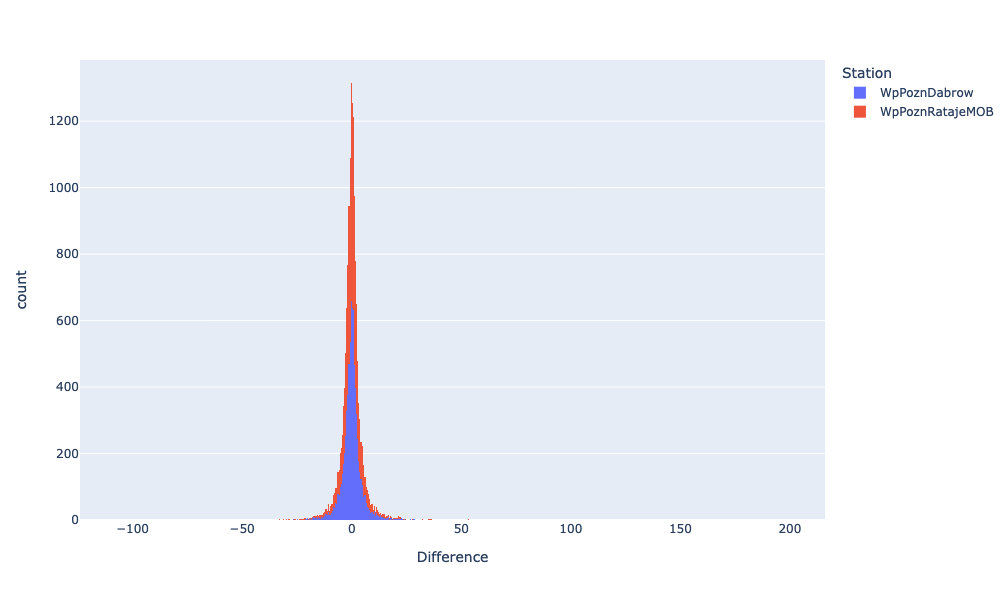

In [13]:
plot_change_between_consecutive_hours(data, stations)

**Difference between stations**

In [14]:
def plot_diff_between_stations(data, station1, station2):
    """Plot a difference between two stations"""
    df = data[stations].diff(axis=1).iloc[:,1].rename('Difference')
    x = df.dropna().values
    fig = px.histogram(x=x, height=600)
    print(df.agg(['mean', 'median', 'max', 'std']))
    fig.show()

mean       -2.171091
median     -2.297050
max       208.842800
std         8.405863
Name: Difference, dtype: float64


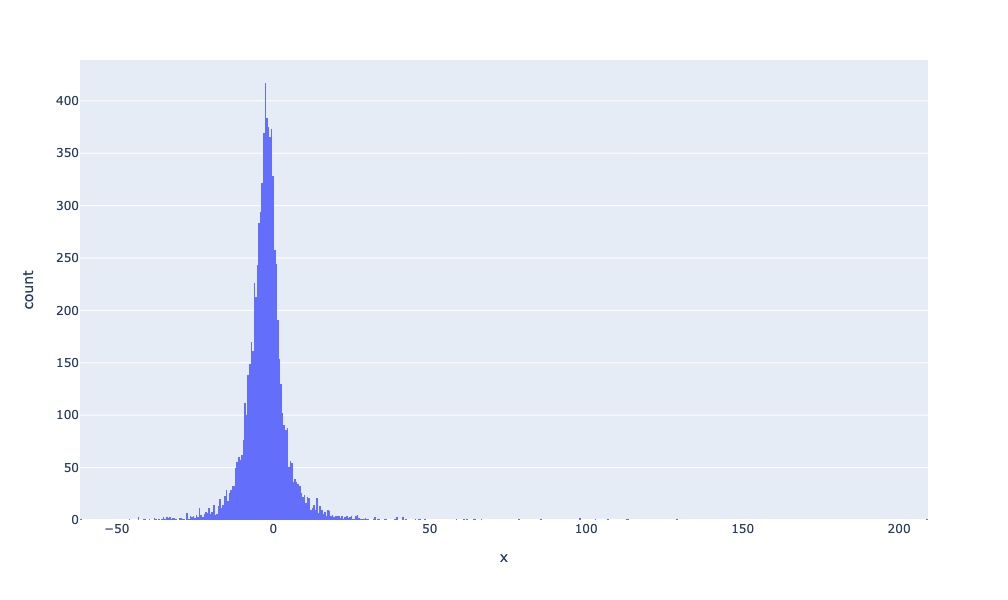

In [15]:
plot_diff_between_stations(data, *stations)

## Remove outliers

In [16]:
data_rm_outliers = remove_outliers(data, stations)
data_rm_outliers = interpolate_missing_values(data_rm_outliers, stations)

In [17]:
data.isnull().sum()

Time                 0
WpPoznDabrow       930
WpPoznRatajeMOB     20
dtype: int64

In [18]:
data_rm_outliers.isnull().sum()

Time                 0
WpPoznDabrow       912
WpPoznRatajeMOB      6
dtype: int64

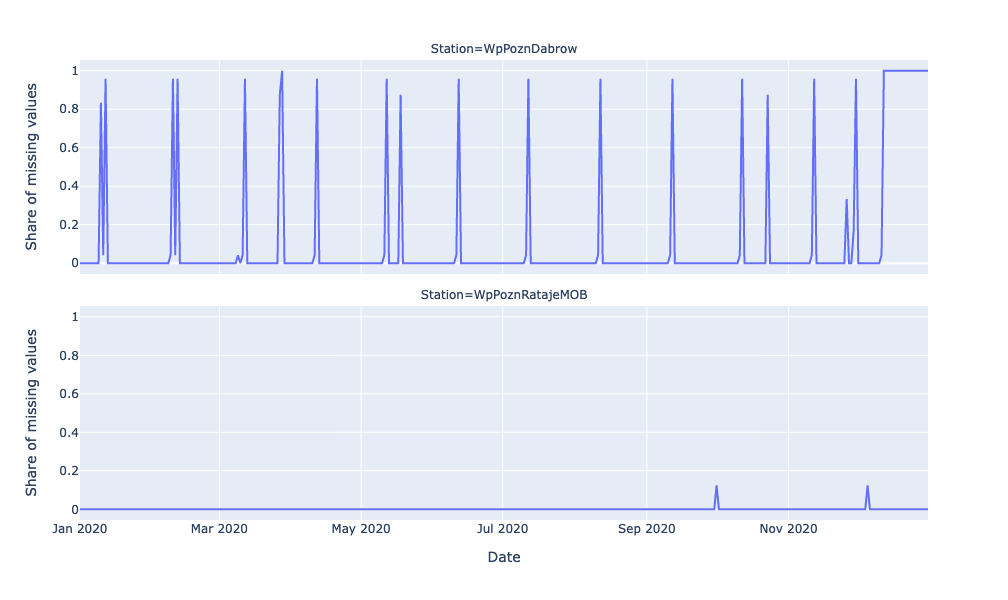

In [19]:
plot_missing_values(data_rm_outliers, stations)

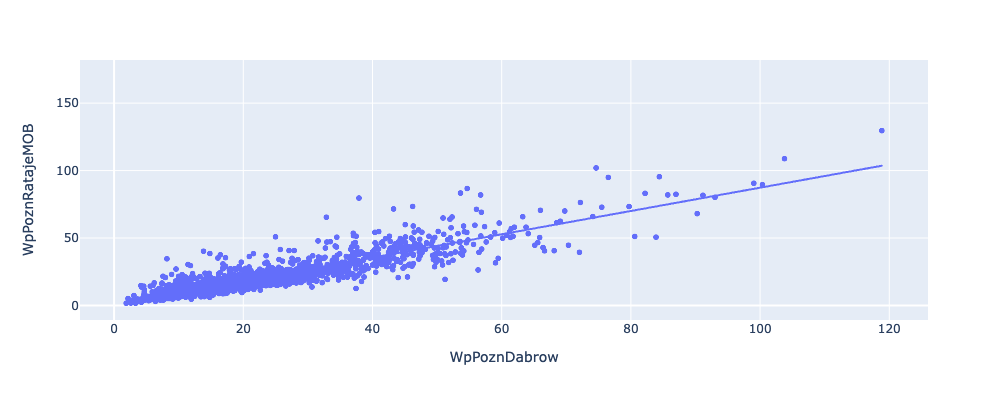

In [20]:
plot_correlation_between_stations(data_rm_outliers, stations[0], stations[1])

## Calculate final mean value across all the stations

In [21]:
data_mean = calculate_mean_value_across_all_stations(data_rm_outliers)

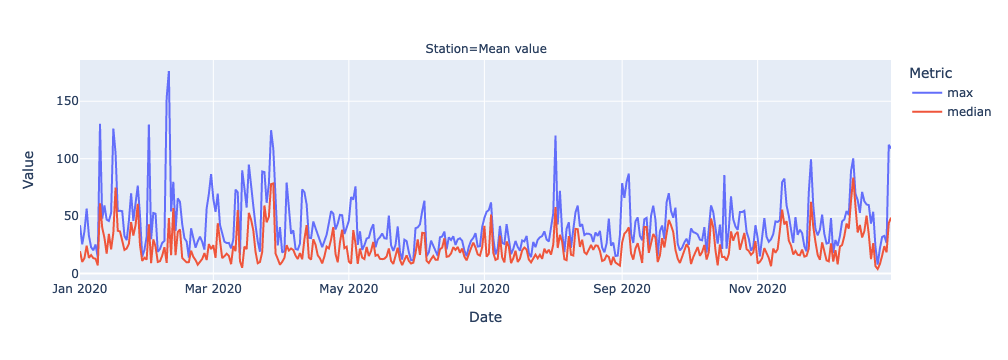

In [22]:
plot_max_median(data_mean, ['Mean value'])

In [23]:
data_mean.isnull().sum()

Time          0
Mean value    0
dtype: int64

**Save mean data**

In [24]:
save_mean_data(data_mean, 'PM10')